In [25]:
import numpy as np
import matplotlib.pyplot as plt

import const

from pp import read, plot_traj


In [181]:
SCAT, BREM, EXC, ION, BTURB = 0, 1, 2, 3, 4


In [311]:
id_list, data = read('../data2')


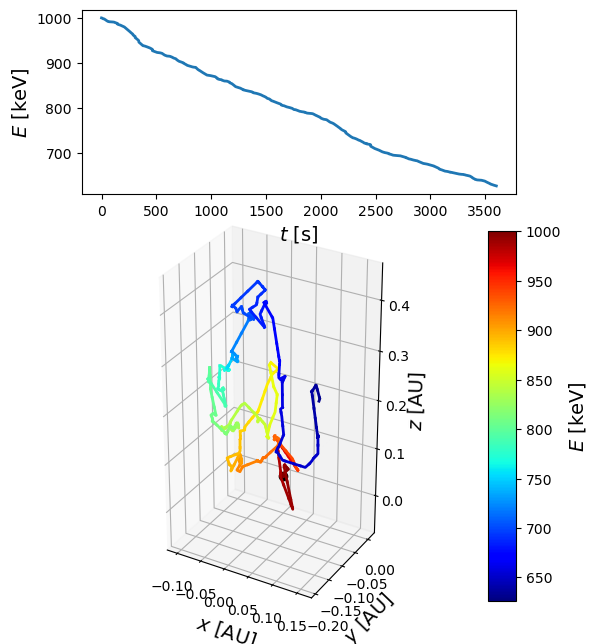

In [312]:
idx = 10

#plot_traj(data, 1, var_c=data.time, unit_c=1., cbar_label=r'$t$ [${\rm s}$]', cval=0, do_top=False)
plot_traj(data[idx], var_c=data[idx].ener, unit_c=1e3, cbar_label=r'$E$ [${\rm keV}$]', cval=1000000, do_top=True)


Text(0.5, 1.0, 'Energy Loss by Different Mechanisms')

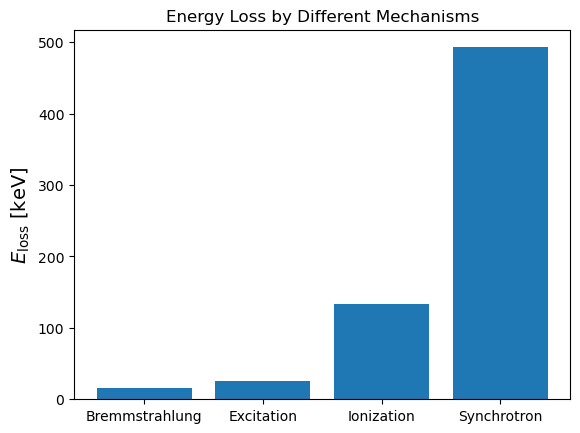

In [313]:
fig, ax = plt.subplots()

npart = 0
ener_loss_list = np.zeros(4)

for i, data_1part in enumerate(data):
    
    for i, interaction in enumerate([BREM, EXC, ION]):
        cond = data_1part.interaction==interaction
        ener_loss_list[i] += np.sum(data_1part.ener_loss[cond])
    ener_loss_list[-1] += np.sum(data_1part.ener_loss_sync)
    npart += 1
    
ener_loss_list = ener_loss_list / npart
ax.bar(np.arange(4), ener_loss_list/1e3)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Bremmstrahlung', 'Excitation', 'Ionization', 'Synchrotron'])

plt.ylabel(r'$E_{\rm loss}$ [${\rm keV}$]', fontsize=14)
plt.title('Energy Loss by Different Mechanisms')


Text(0.5, 1.0, 'Number of Ionizations per Elements')

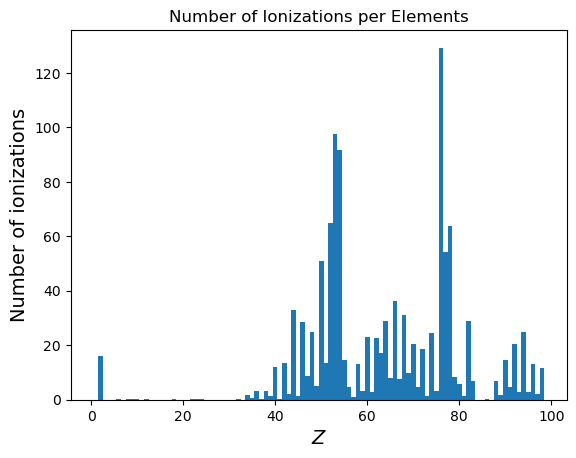

In [314]:
Zelem_bins = np.arange(0.5, 99.5)
Zelem = (Zelem_bins[1:] + Zelem_bins[:-1]) / 2

npart = 0
nion = 0

for data_1part in data:

    nion_1part, _ = np.histogram(data_1part.Zelem[data_1part.interaction==ION], bins=Z_bins)
    nion += nion_1part
    npart += 1
    
nion = nion / npart

plt.bar(Zelem, nion, width=1)

plt.xlabel(r'$Z$', fontsize=14)
plt.ylabel(r'Number of ionizations', fontsize=14)
plt.title('Number of Ionizations per Elements')


Text(0.5, 1.0, 'Spectrum of Secondary Electrons Produced by Ionization')

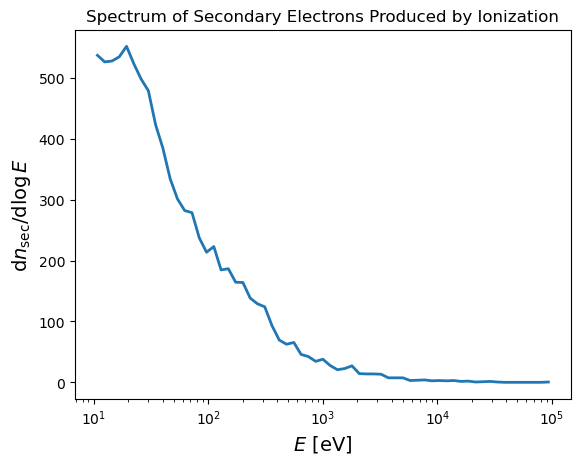

In [315]:
num = 64
ener_bins = np.logspace(1, 5, num)
ener = (ener_bins[1:] + ener_bins[:-1]) / 2

npart = 0
nsec = 0

for data_1part in data:

    ener_sec_1part = data_1part.ener_sec[data_1part.interaction==ION]
    nsec_1part, _ = np.histogram(ener_sec_1part, bins=ener_bins)
    nsec += nsec_1part
    npart += 1
    
dndE = nsec / (np.log10(ener_bins)[1:] - np.log10(ener_bins)[:-1]) / npart

plt.plot(ener, dndE, lw=2)
plt.xscale('log')

plt.xlabel(r'$E$ $[{\rm eV}]$', fontsize=14)
plt.ylabel(r'${\rm d}n_{\rm sec}/{\rm d}\log E$', fontsize=14)
plt.title('Spectrum of Secondary Electrons Produced by Ionization')
    

Text(0.5, 1.0, 'Energy Loss Rate vs. Time')

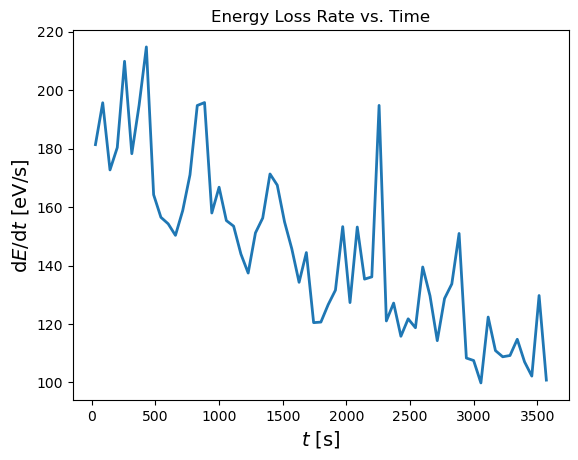

In [316]:
tmax = 3600
num = 64
time_bins = np.linspace(0, tmax, num)
time = (time_bins[:-1] + time_bins[1:]) / 2

npart = 0
ener_loss = 0

for data_1part in data:

    ener_loss_1part = data_1part.ener_loss + data_1part.ener_loss_sync
    ener_loss_1part, _ = np.histogram(data_1part.time, weights=ener_loss_1part, bins=time_bins)
    ener_loss += ener_loss_1part
    npart += 1
    
dEdt = ener_loss / (time_bins[1:] - time_bins[:-1]) / npart
plt.plot(time, dEdt, lw=2)

plt.xlabel(r'$t$ $[{\rm s}]$', fontsize=14)
plt.ylabel(r'${\rm d}E/{\rm d}t$ $[{\rm eV/s}]$', fontsize=14)
plt.title('Energy Loss Rate vs. Time')


Text(0.5, 1.0, 'Energy Deposition vs. Distance')

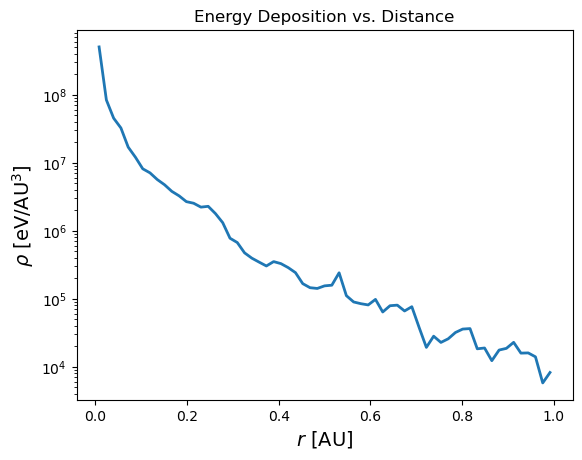

In [318]:
dis_max = 1*const.AU
num = 64
dis_bins = np.linspace(0, dis_max, num)
dis = (dis_bins[1:] + dis_bins[:-1]) / 2

npart = 0
ener_loss = 0

for data_1part in data:

    dis_ev = np.sqrt(data_1part.x**2+data_1part.y**2+data_1part.z**2)
    ener_loss_ev = data_1part.ener_loss + data_1part.ener_loss_sync
    ener_loss_1part, _ = np.histogram(dis_ev, weights=ener_loss_ev, bins=dis_bins)
    ener_loss += ener_loss_1part
    npart += 1
    
dEdr = ener_loss / (dis_bins[1:] - dis_bins[:-1]) / (4*np.pi*dis**2) / npart
plt.plot(dis/const.AU, dEdr*const.AU**3, lw=2)
plt.yscale('log')

plt.xlabel(r"$r$ [${\rm AU}$]", fontsize=14)
plt.ylabel(r"$\rho$ [${\rm eV/AU^3}$]", fontsize=14)
plt.title('Energy Deposition vs. Distance')
